# LOFAR OPC UA single station imaging

In [1]:
import os
import sys
import time
import datetime
import glob
import numpy as np

from lofarantpos.db import LofarAntennaDatabase
from lofarimaging import read_acm_cube, get_station_type, make_xst_plots

# Determining and plotting the altitude/azimuth of a celestial object

In [2]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style, quantity_support
import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.time import Time

plt.style.use(astropy_mpl_style)
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x180ddcf2ab0>

In [3]:
# import os
# import datetime
# import configparser
# from typing import List, Dict, Tuple, Union

# import numpy as np
# from packaging import version
# import tqdm
# import h5py


# from astropy.coordinates import SkyCoord, GCRS, EarthLocation, AltAz, get_sun, get_body
# import astropy.units as u
# from astropy.time import Time

# import lofargeotiff
# from lofarantpos.db import LofarAntennaDatabase
# import lofarantpos

# from lofarimaging import nearfield_imager, sky_imager, skycoord_to_lmn, subtract_sources, get_full_station_name
# station_name = "LV614"
# integration_time_s = 2
# rcu_mode = 3
# station_type = get_station_type(station_name)
# obsdatestr, obstimestr, *_ = os.path.basename(xst_filename).rstrip(".dat").split("_")
# obstime = datetime.datetime.strptime(obsdatestr + ":" + obstimestr, '%Y%m%d:%H%M%S')
# fname = f"{obstime:%Y%m%d}_{obstime:%H%M%S}_{station_name}_SB{subband}"
# obstime_astropy = Time(obstime)

# db = LofarAntennaDatabase()
# config = configparser.ConfigParser()
# config.read("sources.ini")
# marked_bodies = {
#         'Cas A': SkyCoord(ra=float(config['Cas A']['RA']) * u.deg, dec=float(config['Cas A']['DEC']) * u.deg, frame='icrs')
# }

# station_name = get_full_station_name(station_name, rcu_mode)
# station_earthlocation = EarthLocation.from_geocentric(*(db.phase_centres[station_name] * u.m))
# gcrs_instance = GCRS(obstime = obstime_astropy)
# zenith = AltAz(az=0 * u.deg, alt=90 * u.deg, obstime=obstime_astropy,
#                 location=station_earthlocation).transform_to(gcrs_instance)

# print(marked_bodies['Cas A'].transform_to(AltAz(location=station_earthlocation, obstime=obstime_astropy)).alt,
#       skycoord_to_lmn(marked_bodies['Cas A'], zenith))

# altaz_frame = AltAz(location=station_earthlocation, obstime=obstime_astropy)
# cas_a_altaz = marked_bodies['Cas A'].transform_to(altaz_frame)

# cas_a_el = cas_a_altaz.alt.deg
# cas_a_az = cas_a_altaz.az.deg
# print(f"Cas A Alt: {cas_a_el}, Az: {cas_a_az}")
# marked_bodies_lmn[body_name] = skycoord_to_lmn(marked_bodies[body_name], zenith)

In [4]:
import configparser
config = configparser.ConfigParser()
config.read("sources.ini")
marked_bodies = {
        'Cas A': SkyCoord(ra=float(config['Cas A']['RA']) * u.deg, dec=float(config['Cas A']['DEC']) * u.deg, frame='icrs'),
        'For A': SkyCoord(config['For A']['ICRS_coord'], unit=(u.hourangle, u.deg))
}
print(marked_bodies['For A'].ra, marked_bodies['For A'].dec,
      marked_bodies['Cas A'].ra, marked_bodies['Cas A'].dec)


50d40m26.835s -37d12m29.52s 350d51m00s 58d48m54s


In [ ]:
xst_filename = "./sorted_subbands/subband_283/20230111_072040_xst.dat"
# "../data/sess_sid20230111T071252_LV614/scan_59955.30061/LV614_20230111_071256_spw3_sb51_461_int1_dur24300_dir0,0,SUN_xst/20230111_072040_xst.dat"
caltable_dir = "./test/CalTables"

# Read subband from .h file

import re

# Assuming h_filename is already defined
h_filename = xst_filename.replace(".dat", ".h")

# Read the .h file
if os.path.exists(h_filename):
    with open(h_filename, 'r') as file:
        content = file.read()
    match = re.search(r'--xcsubband=(\d+)', content)
    subband = int(match.group(1)) if match else None
else:
    print(f"the hfile wasn't found {h_filename}")
    subband = None

# Find the subband number using regex
match = re.search(r'--xcsubband=(\d+)', content)
if match:
    subband = int(match.group(1))
else:
    subband = None

print("Subband: ", subband)

Subband:  283


In [6]:
# %time obstime, visibilities, rcu_mode = download_xst(subband, integration_time_s)
# rcu_mode

# cube, calibration_info = apply_calibration(cube, station_name, rcu_mode, subband, caltable_dir=caltable_dir)

In [7]:
# import h5py

# Open the HDF5 file
# h5file = h5py.File(r"C:\Users\jorge\OneDrive\Escritorio\BachelorTesis\scripts\lofarimaging\imgSameSubband\results.h5", 'r')

# List all observation numbers (group names) in the HDF5 file
# obsnums = list(h5file.keys())
# print(obsnums)

# Close the HDF5 file
# h5file.close()

In [8]:
# from lofarimaging import make_sky_movie, reimage_sky
# db = LofarAntennaDatabase()
# fig = reimage_sky(h5file, "obs000002", db, subtract=["Cas A"])
# fig
# make_sky_movie('movieForSubbands263164419.mp4', h5file, obsnums)

In [14]:
station_name = "LV614"
integration_time_s = 2
rcu_mode = 3
station_type = get_station_type(station_name)
obsdatestr, obstimestr, *_ = os.path.basename(xst_filename).rstrip(".dat").split("_")
obstime = datetime.datetime.strptime(obsdatestr + ":" + obstimestr, '%Y%m%d:%H%M%S')
visibilities = read_acm_cube(xst_filename, station_type)[0]
# sky_fig, ground_fig, leaflet_map = make_xst_plots(cube[0, :, :], station_name, obstime, subband, rcu_mode, subtract=["Cyg A","Cas A", "Sun"])
sky_fig, ground_fig, leaflet_map = make_xst_plots(visibilities, station_name, obstime, subband, rcu_mode, outputpath="./results")

Maximum at 102m east, -150m north of station center (lat/long 57.55553, 21.85662)


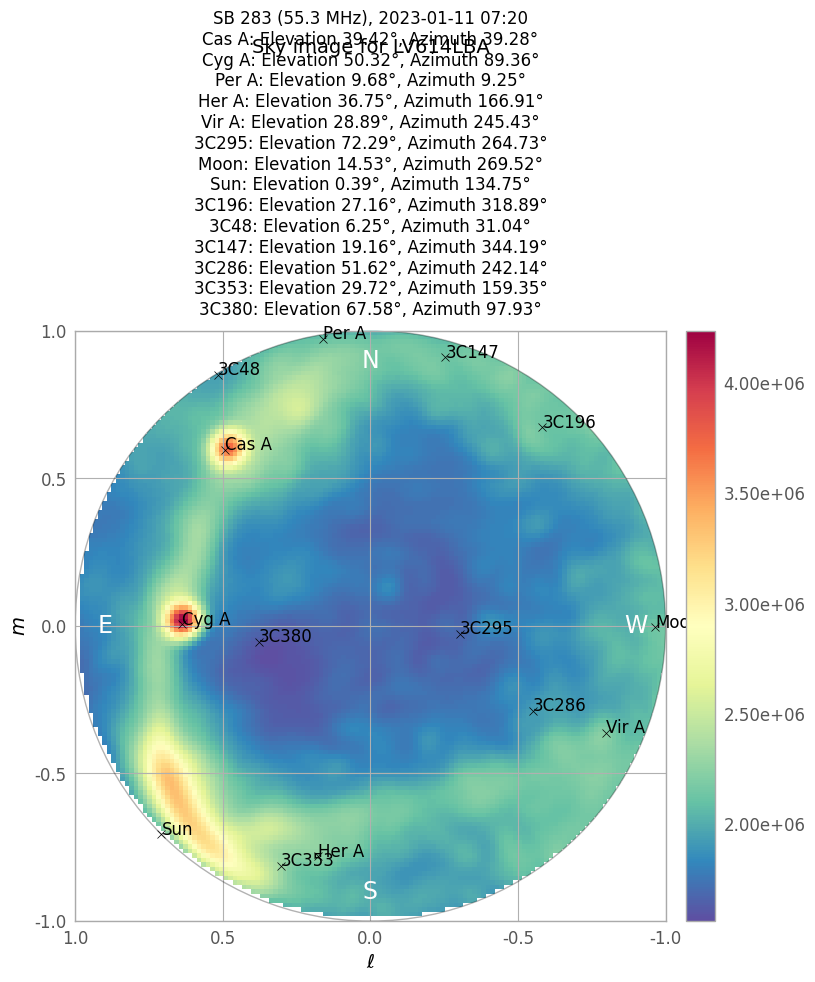

In [15]:
sky_fig

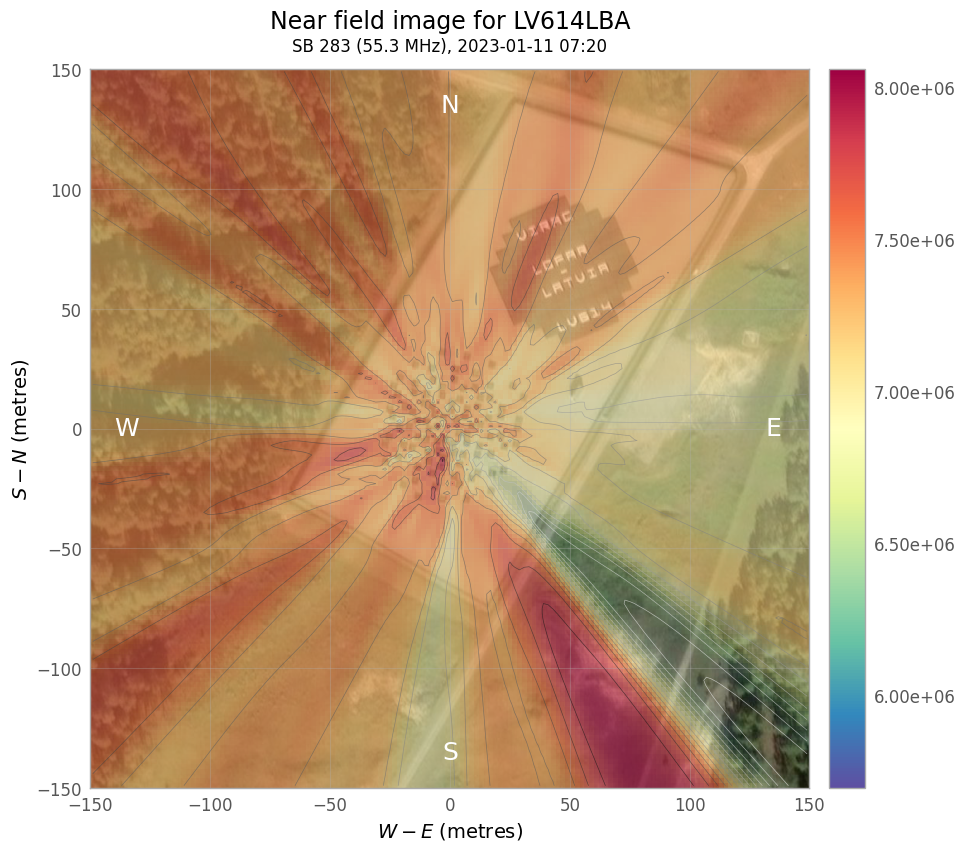

In [11]:
ground_fig


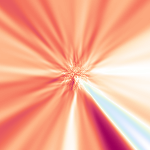

In [12]:
leaflet_map